In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('./data/weather_classification_data.csv')
print(f'Number of rows {df.shape[0]} and Number of col {df.shape[1]}')
print('\n')
print(df.head(5))
print('\n')
print(f'Missing values :-')
print(df.isnull().sum())

Number of rows 13200 and Number of col 11


   temperature  humidity  wind_speed  ...  visibility (km)  location  weather_type
0           14        73         9.5  ...              3.5    inland         Rainy
1           39        96         8.5  ...             10.0    inland        Cloudy
2           30        64         7.0  ...              5.5  mountain         Sunny
3           38        83         1.5  ...              1.0   coastal         Sunny
4           27        74        17.0  ...              2.5  mountain         Rainy

[5 rows x 11 columns]


Missing values :-
temperature             0
humidity                0
wind_speed              0
precipitation (%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility (km)         0
location                0
weather_type            0
dtype: int64


In [26]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


([<matplotlib.patches.Wedge at 0x176e1c550>,
 [Text(0.2567898286238212, 1.0696069296313242, ''),
  Text(-1.0881228849137425, -0.1612097618849259, ''),
  Text(-0.22972655855619395, -1.075744257848457, ''),
  Text(0.9121364557895789, -0.6148228086364604, '')])

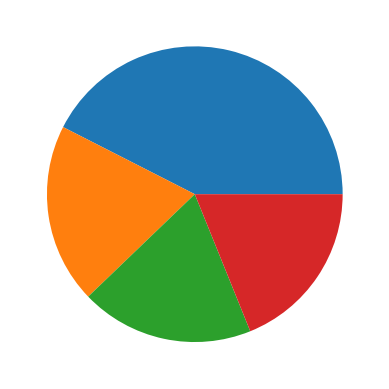

In [27]:
plt.pie(df['season'].value_counts())

<Axes: xlabel='humidity', ylabel='Count'>

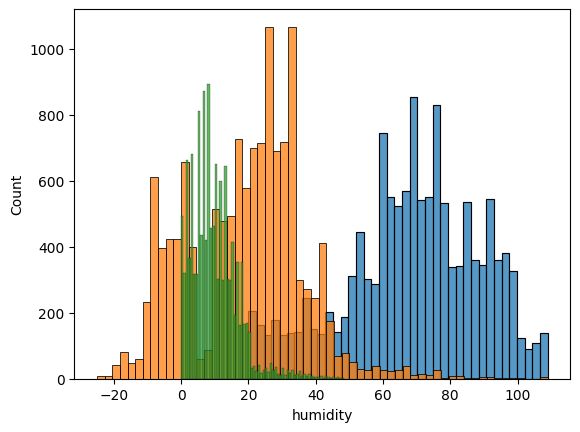

In [28]:
sns.histplot(df['humidity'])
sns.histplot(df['temperature'])
sns.histplot(df['wind_speed'])

<Axes: ylabel='precipitation (%)'>

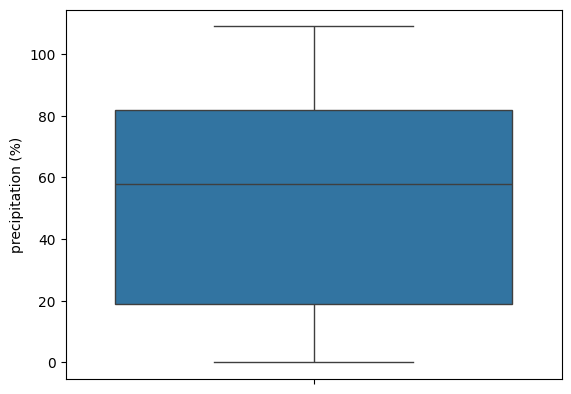

In [29]:
sns.boxplot(df['precipitation (%)'])

In [30]:
# split categorical and Numirical data

x = df.drop('weather_type',axis=1)
y = df['weather_type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

print(num_feature)
print(cat_feature)


Index(['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)'],
      dtype='object')
Index(['cloud_cover', 'season', 'location'], dtype='object')


In [31]:
transform = ColumnTransformer(
    [
        ('encoder',OneHotEncoder(drop='first'),cat_feature),
        ('scale',StandardScaler(),num_feature)
    ]
    
)

print(transform)

x_train = transform.fit_transform(x_train)
x_test = transform.transform(x_test)

ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),
                                 Index(['cloud_cover', 'season', 'location'], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)'],
      dtype='object'))])


The test Acurracy is 0.884090909090909
classification_report 
               precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       651
       Rainy       0.87      0.86      0.86       647
       Snowy       0.89      0.95      0.92       701
       Sunny       0.91      0.88      0.89       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

Number of itration [43933 38790 39649 20766 15305 16239]


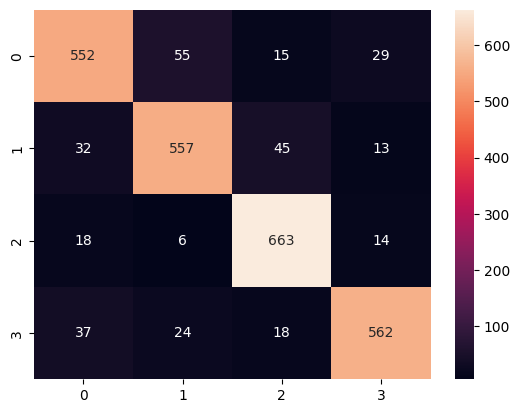

In [38]:
# Linear Model

model = SVC(kernel='linear')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'The test Acurracy is {acc}')

cr = classification_report(y_test,y_pred)
print(f'classification_report \n {cr}')

cm = confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')

print(f'Number of itration {model.n_iter_}')

The test Acurracy is 0.9094696969696969
classification_report 
               precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.88       651
       Rainy       0.90      0.90      0.90       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.92      0.89      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Number of itration [1417  829 1462  879 1278  770]


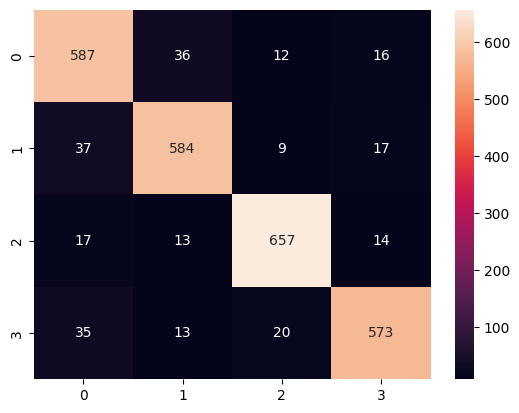

In [39]:
# RBF Model

model = SVC(kernel='rbf')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'The test Acurracy is {acc}')

cr = classification_report(y_test,y_pred)
print(f'classification_report \n {cr}')

cm = confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')

print(f'Number of itration {model.n_iter_}')

In [43]:
x = df.drop('weather_type',axis=1)
y = df['weather_type']

num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

transform = ColumnTransformer(
    [
        ('encoder',OneHotEncoder(drop='first'),cat_feature),
        ('scale',MinMaxScaler(),num_feature)
    ]
    
)


pip = Pipeline([
    ('trans',transform),
    ('svc',SVC(kernel='rbf'))
])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

pip.fit(x_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['cloud_cover', 'season', 'location'], dtype='object')),
                                                 ('scale', MinMaxScaler(),
                                                  Index(['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)'],
      dtype='object'))])),
                ('svc', SVC())])

In [44]:
y_pred = pip.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.8886363636363637

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Cloudy       0.83      0.88      0.85       651
       Rainy       0.88      0.86      0.87       647
       Snowy       0.92      0.94      0.93       701
       Sunny       0.92      0.88      0.90       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



In [48]:
pip.named_steps['svc'].n_iter_.mean()

np.float64(1069.5)